In [1]:
%load_ext autoreload
%autoreload 2

import sys; sys.path.append('../')
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
from src.utils.graphs import get_keypoints, relative_neighborhood, random_graph
from src.utils.keypoints_filter import mean_distance_filter
from scipy.spatial.distance import cdist
from src.utils.visualize import plot_voronoi
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import pandas as pd
import numpy as np
import cv2 as cv
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 120
JSON_EXT = ".json"
JPG_EXT = ".jpg"

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
 color = {
        1:"brown",
        2:"blue",
        3:"green",
        4:"red"
    }
N_FEATURES_LIMIT = None 
img_name = r"p1_0299_6"
train_set = r"../data/Ki67/SHIDC-B-Ki-67/Train"

path_json=os.path.join(train_set,img_name+JSON_EXT)
print(path_json)
path = os.path.join(train_set,img_name+JPG_EXT)
print(os.path.isfile(path_json))
json_df = pd.read_json(path_json)
json_df

../data/Ki67/SHIDC-B-Ki-67/Train\p1_0299_6.json
True


,x,y,label_id
0,88,105,1
1,390,141,1
2,402,220,1
3,383,280,1
4,100,333,1
...,...,...,...
179,386,1208,2
180,1074,1208,2
181,796,1211,2
182,292,1213,2


In [5]:
def show_img_df(path,json_df):
    fig, ax = plt.subplots()
    img = mpimg.imread(path)
    sift = cv.SIFT_create(nfeatures = 0,nOctaveLayers = 3,contrastThreshold = 0.04,edgeThreshold = 3,sigma = 1.6)
    kp, desc = sift.detectAndCompute(img,None)
    kp_gr, desc_gr = sift.detectAndCompute(img,None)
    print(len(kp)==len(kp_gr))
    #keys = get_keypoints(img,detector=sift)
    keys = list([key.pt for key in kp])
    #assert len(kp)==len(keys)
    #dist= cdist(keys,keys)
    #print(dist.shape)
    img=cv.drawKeypoints(img,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    for idx , row in json_df.iterrows():
        x = row[0]; y = row[1]; label = row[2]
        ax.plot(x, y, marker='^', color=color[label])
    ax.imshow(img)
    plt.show()
    vor = Voronoi(keys)
    plot_voronoi(vor,img,show_points=True,show_verticles=False,line_width=0.5)
    return kp

In [239]:
keypoint_json_point_idx = knn.predict(keys)

In [240]:
keypoint_json_point_idx

array([2, 2, 2, 2, 1, 1, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [241]:
k = list(zip(keys,keypoint_json_point_idx))

In [242]:
X[162]

(465, 1196)

In [243]:
k[0]

((38.67266845703125, 1027.7144775390625), 2)

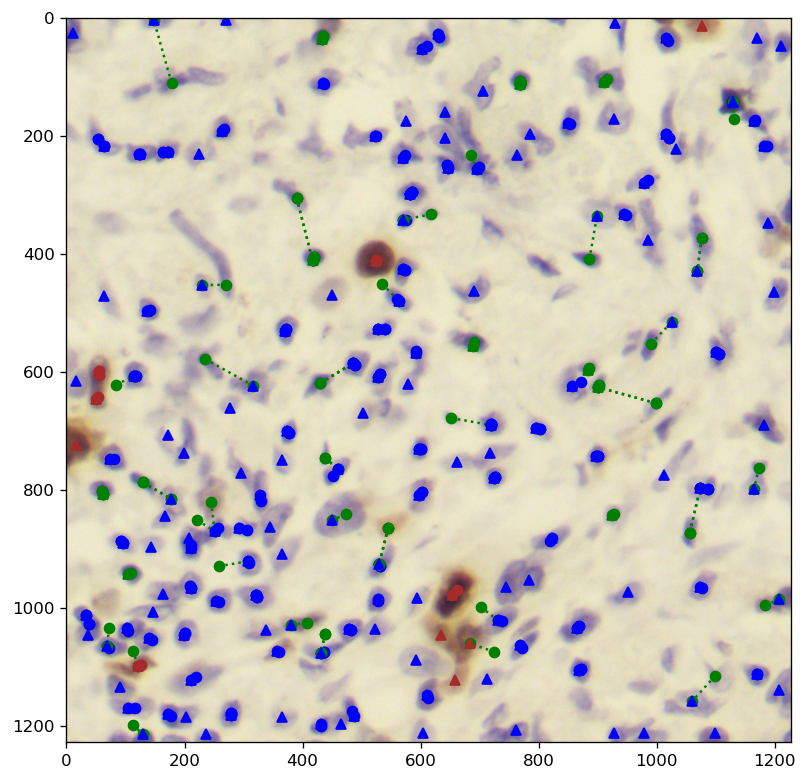

In [283]:
fig, ax = plt.subplots()
dists = []
points_to_kill = []
for point in k:
    pt = point[0]
    dist, idxes = knn.kneighbors([point[0]], return_distance=True)
    label = point[1]
    point_x = json_df.x[idxes[0,0]]
    point_y = json_df.y[idxes[0,0]]
    #print(point_x)
    dists.append(dist.mean())
    if dist.mean() > 17:
        label=3
        points_to_kill.append(point)
    ax.plot([int(pt[0]),point_x], [int(pt[1]),point_y], marker='o',linestyle=':', color=color[label])
for idx , row in json_df.iterrows():
    x = row[0]; y = row[1]; label = row[2]
    ax.plot(x, y, marker='^', color=color[label])
ax.imshow(img)

In [280]:
sum(dists)/len(dists)

17.380245537592426

In [302]:
keys_n =np.unique(keys,axis=0)
dist = cdist(keys_n,keys_n)

In [4]:
def get_min_distance_between_points(path):
    json_df = pd.read_json(path)
    if not json_df.empty:
        xy = list(zip(json_df.x,json_df.y))
        if len(xy)>1:
            dist = cdist(xy,xy)
            dist_mins = min([min(row[row != 0]) for row in dist])
            return dist_mins
        else:
            return sys.maxsize
    else:
        return sys.maxsize

In [29]:


root = r"../data/Ki67/SHIDC-B-Ki-67/" 
distances_from_files=[]
for root, dirs, files in os.walk(root, topdown=False):
    for file in files:
        if file.split('.')[1]=='json':
            path = os.path.join(root,file)
            d=get_min_distance_between_points(path)
            distances_from_files.append(d)
distances_from_files.sort()
distances_from_files

[2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.8284271247461903,
 2.8284271247461903,
 2.8284271247461903,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.605551275463989,
 3.605551275463989,
 3.605551275463989,
 3.605551275463989,
 3.605551275463989,
 3.605551275463989,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.242640687119285,
 4.242640687119285,
 4.242640687119285,
 4.47213595499958,
 4.47213595499958,
 4.47213595499958,
 4.47213595499958,
 4.47213595499958,
 4.47213595499958,
 4.47213595499958,
 4.47213595499958,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.385164807134504,
 5.385164807134504,
 5.385164807134504,
 5.385164807134504,
 5.385164807134504,
 5.385164807134504,
 5.385164807134504,
 5.385164807134504,
 5.385164807134504,
 5.385164807134504,
 5.385164807134504,
 5.385164807134504,

../data/Ki67/SHIDC-B-Ki-67/Train\p1_0308_7.jpg
463
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579905816295702 300
1.2579

1.7393739892180968 300
1.7393739892180968 300
1.7393739892180968 300
1.7393739892180968 300
1.7393739892180968 300
1.7393739892180968 300
1.7393739892180968 300
1.7393739892180968 300
1.7393739892180968 300
1.7393739892180968 300
1.7393739892180968 300
1.7393739892180968 300
1.7393739892180968 300
1.7393739892180968 300
1.7393739892180968 300
1.7393739892180968 300
1.7393739892180968 300
1.7393739892180968 300
1.7393739892180968 300
1.7393739892180968 300
1.7393739892180968 300
1.7393739892180968 300
1.7393739892180968 300
1.7393739892180968 300
1.7393739892180968 300
1.7393739892180968 300
1.7393739892180968 300
1.7393739892180968 300
1.7393739892180968 300
1.7393739892180968 300
1.7393739892180968 300
1.7393739892180968 300
1.7393739892180968 300
1.7393739892180968 300
1.7393739892180968 300
1.7393739892180968 300
1.8876181547940165 300
1.8876181547940165 300
1.8876181547940165 300
1.8876181547940165 300
1.8876181547940165 300
1.8876181547940165 300
1.8876181547940165 300
1.887618154

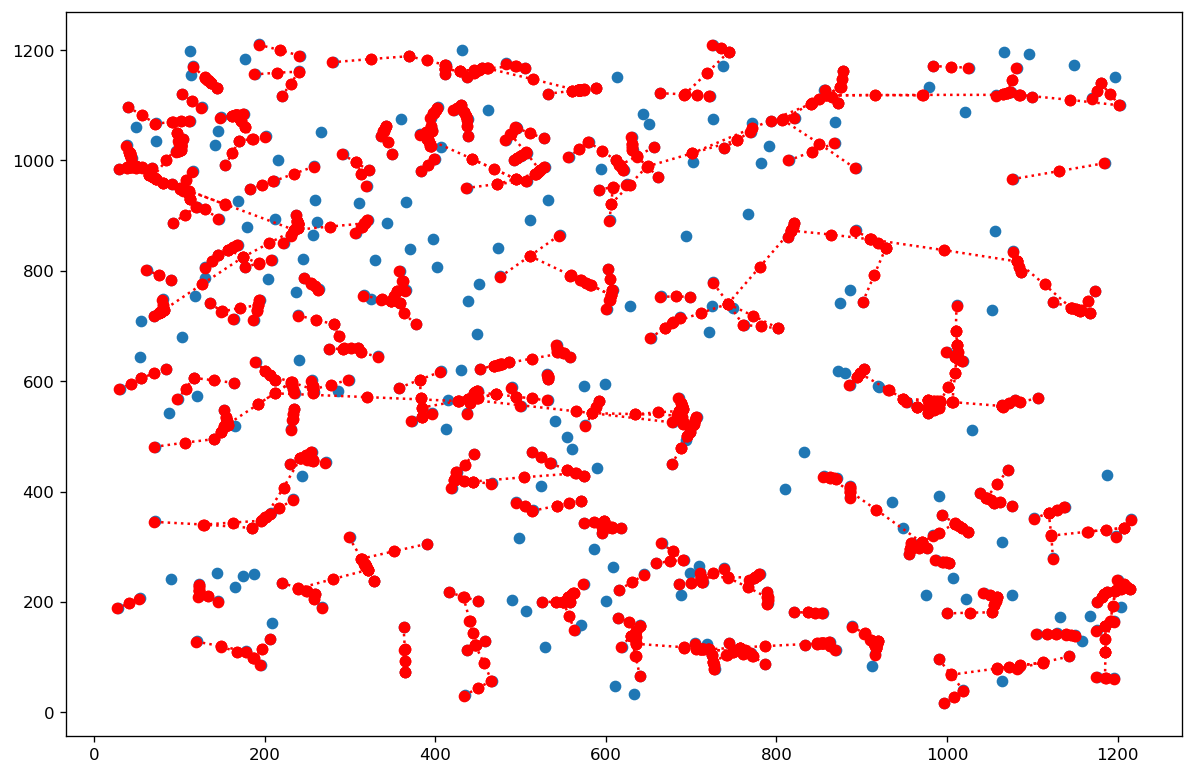

In [19]:
print(path)
#print('min dist',get_min_distance_between_points(path_json))
img = mpimg.imread(path)
#sift = cv.SIFT_create(nfeatures = 0,nOctaveLayers = 3,contrastThreshold = 0.08,edgeThreshold = 10,sigma = 1.6)
sift= cv.SIFT_create()
kp, desc = sift.detectAndCompute(img,None)
keys = get_keypoints(img,detector=sift)
keys =list(np.unique(keys,axis=0))
keys = [list(k) for k in keys]
print(len(keys))
filtered_keys = mean_distance_filter(keys,True,300)

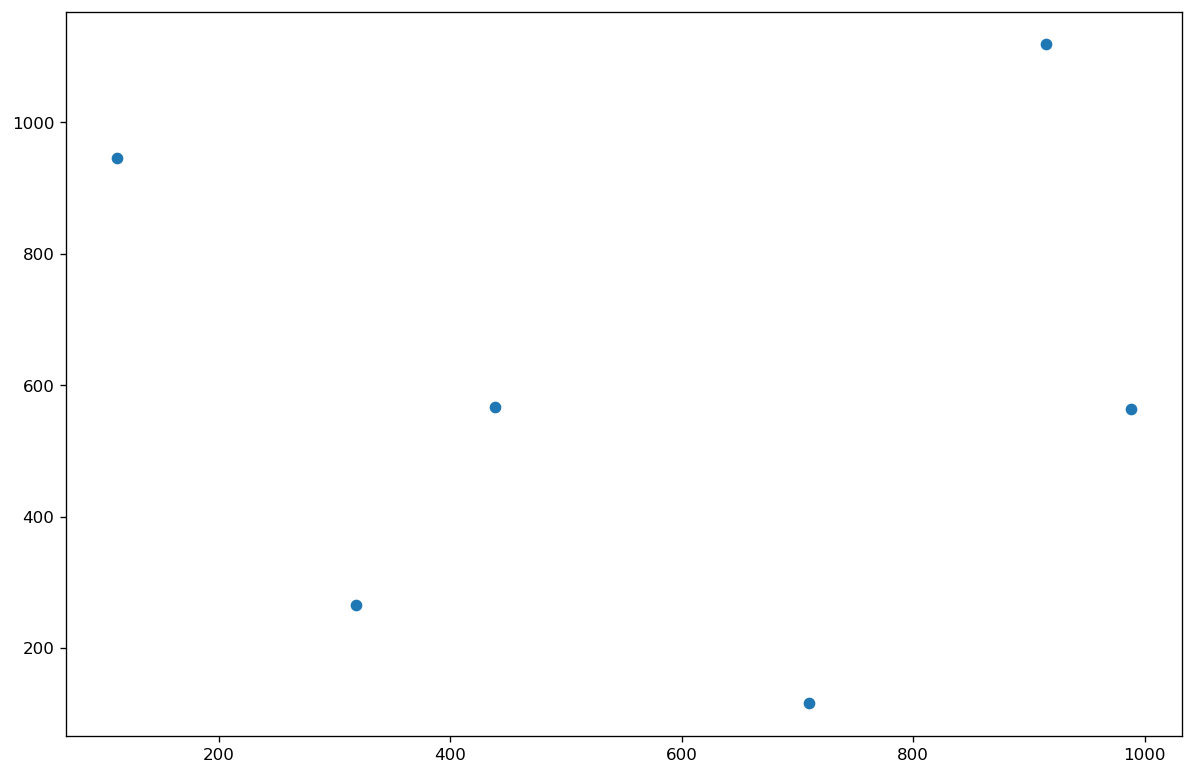

In [20]:
x,y = zip(*filtered_keys)
plt.scatter(x, y,alpha=1)

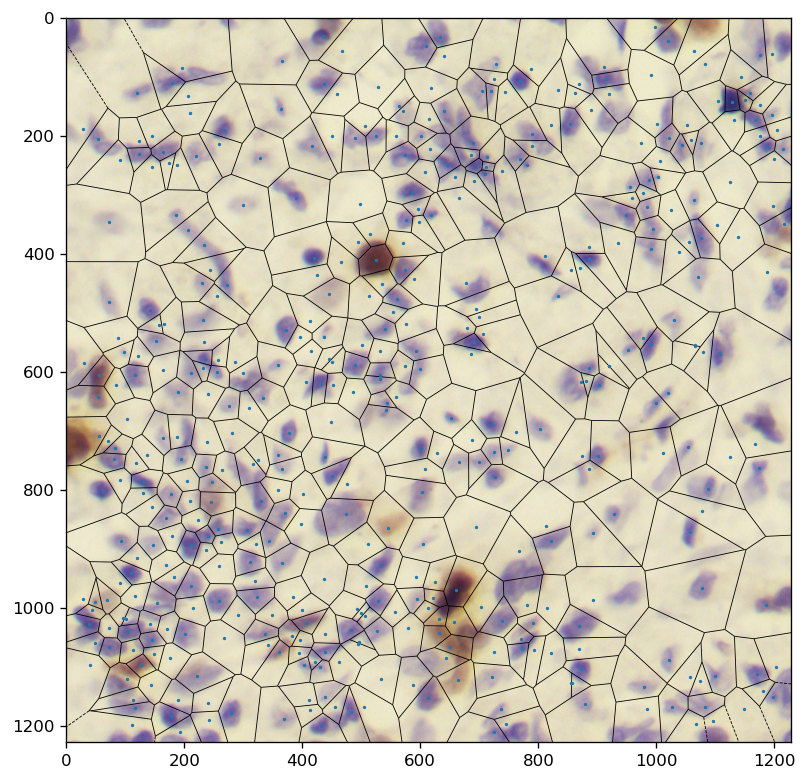

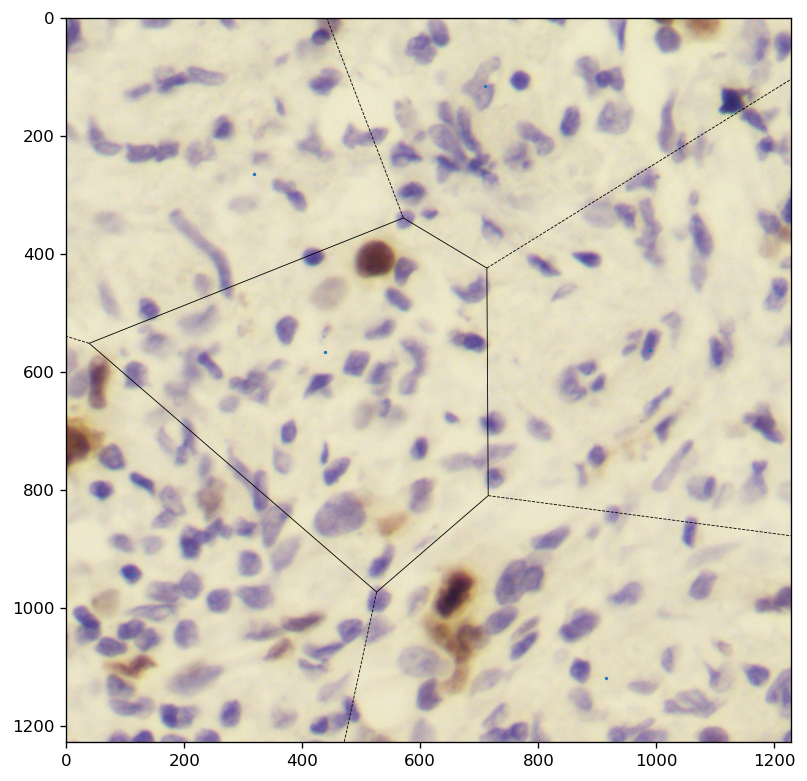

In [21]:
vor = Voronoi(keys)
x=plot_voronoi(vor, img, points_size=2, line_width=0.5, show_points=True, show_verticles=False,save_as_file=False,filename='')
vor_fil = Voronoi(filtered_keys)
x=plot_voronoi(vor_fil, img, points_size=2, line_width=0.5, show_points=True, show_verticles=False,save_as_file=False,filename='')